QQuestion 1:

In [5]:

import pandas as pd
users = pd.read_csv("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user",sep='|')
users

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [7]:
mean_age_per_occupation = users.groupby('occupation').agg({'age': ['mean']})
mean_age_per_occupation

,age
,mean
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500


In [9]:
users['male'] = users.gender.apply(lambda x: True if x=='M' else False)
(users.groupby('occupation').male.sum() / users.groupby('occupation').gender.count()).sort_values(ascending = False).round(2)


occupation
doctor           1.00
engineer         0.97
technician       0.96
retired          0.93
programmer       0.91
executive        0.91
scientist        0.90
entertainment    0.89
lawyer           0.83
salesman         0.75
educator         0.73
student          0.69
other            0.66
marketing        0.62
writer           0.58
none             0.56
administrator    0.54
artist           0.54
librarian        0.43
healthcare       0.31
homemaker        0.14
dtype: float64

In [11]:
result_1 = users.groupby('occupation').agg({'age': ['min','max']})
result_1

age    
              min max
occupation           
administrator  21  70
artist         19  48
doctor         28  64
educator       23  63
engineer       22  70
entertainment  15  50
executive      22  69
healthcare     22  62
homemaker      20  50
lawyer         21  53
librarian      23  69
marketing      24  55
none           11  55
other          13  64
programmer     20  63
retired        51  73
salesman       18  66
scientist      23  55
student         7  42
technician     21  55
writer         18  60

In [13]:
result_2 = users.groupby(['occupation','gender']).agg({'age': ['mean']})
result_2

age
                           mean
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [15]:
df = (users.groupby('occupation')['gender'].value_counts(normalize=True).reset_index(name='perc'))
df

,occupation,gender,perc
0,administrator,M,0.544304
1,administrator,F,0.455696
2,artist,M,0.535714
3,artist,F,0.464286
4,doctor,M,1.000000
5,educator,M,0.726316
6,educator,F,0.273684
7,engineer,M,0.970149
8,engineer,F,0.029851
9,entertainment,M,0.888889


Question 2:

In [17]:
euro12 = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv")
euro12.head()

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [19]:
goals = euro12['Goals']
goals

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [21]:
teams_count = euro12['Team'].count()
teams_count

16

In [23]:

discipline = euro12[['Team','Yellow Cards','Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [27]:
sorted_values = discipline.sort_values(['Red Cards','Yellow Cards'])
sorted_values

,Team,Yellow Cards,Red Cards
2,Denmark,4,0
5,Germany,4,0
3,England,5,0
8,Netherlands,5,0
15,Ukraine,5,0
4,France,6,0
12,Russia,6,0
1,Czech Republic,7,0
14,Sweden,7,0
0,Croatia,9,0


In [29]:
mean_yellow_cards = discipline.groupby('Team').agg({'Yellow Cards': ['mean']})
mean_yellow_cards

,Yellow Cards
,mean
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0


In [31]:
goals_per_team = euro12[['Team','Goals']]
greater_goals = goals_per_team[goals_per_team['Goals']  > 6]
greater_goals

,Team,Goals
5,Germany,10
13,Spain,12


In [33]:
Teams_names = euro12['Team']
new_val = Teams_names[Teams_names.str.startswith("G")]
new_val

5    Germany
6     Greece
Name: Team, dtype: object

In [35]:
euro12.iloc[:, list(range(7))]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [37]:
euro12.iloc[:, list(range(32))]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [39]:
shooting_accuracy = euro12[['Team','Shooting Accuracy']]
val = shooting_accuracy.loc[shooting_accuracy.Team.isin(['England','Italy','Russia'])]
val

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


Question 3:

In [51]:
import random

col_1,col_2,col_3 = [],[],[]

for i in range(0,300):
    n1 = random.randint(1,4)
    col_1.append(n1)
    n2 = random.randint(1,3)
    col_2.append(n2)
    n3 = random.randint(10000,30000)
    col_3.append(n3)

data = {'bedrs' : col_1,'bathrs':col_2,'price_sqr_meter':col_3}
df = pd.DataFrame(data)
df.head()

,bedrs,bathrs,price_sqr_meter
0,2,1,24329
1,1,3,29294
2,2,1,20054
3,4,3,13989
4,3,2,19854


In [53]:
df.rename(columns = {'Col1': 'bedrs', 'Col2': 'bathrs','Col3':'price_sqr_meter'}, inplace = True)
df.head()

,bedrs,bathrs,price_sqr_meter
0,2,1,24329
1,1,3,29294
2,2,1,20054
3,4,3,13989
4,3,2,19854


In [55]:
total_col = col1+col2+col3
df['bigcolumn'] = total_col
df

,bedrs,bathrs,price_sqr_meter,bigcolumn
0,2,1,24329,4
1,1,3,29294,2
2,2,1,20054,2
3,4,3,13989,2
4,3,2,19854,4
...,...,...,...,...
295,4,2,16206,24361
296,4,2,10183,15497
297,1,3,20527,11714
298,4,1,22159,18469


Question 4:

In [57]:
data = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data", sep='\s+')
data

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\patel\AppData\Local\Temp\ipykernel_18444\1192012223.py:1: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv("https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/Wind_Stats/wind.data", sep='\s+')


,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,78,12,27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,78,12,28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,78,12,29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,78,12,30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [59]:
data["DateTime"] = pd.to_datetime(
    data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1)
)

data = data.drop(columns=["Yr","Mo","Dy"])
data.head()

C:\Users\patel\AppData\Local\Temp\ipykernel_18444\209345283.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["DateTime"] = pd.to_datetime(


,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL,DateTime
0,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04,2061-01-01
1,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83,2061-01-02
2,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71,2061-01-03
3,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88,2061-01-04
4,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83,2061-01-05


In [61]:
data_new = data.set_index("DateTime")
data_new.index.astype("datetime64[ns]")

DatetimeIndex(['2061-01-01', '2061-01-02', '2061-01-03', '2061-01-04',
               '2061-01-05', '2061-01-06', '2061-01-07', '2061-01-08',
               '2061-01-09', '2061-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='DateTime', length=6574, freq=None)

In [63]:
data_new.head()

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
DateTime,,,,,,,,,,,,
2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


Question 5:

In [65]:
chipo = pd.read_table("https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv")
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [67]:
len(chipo.columns)

5

In [69]:
chipo.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [71]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

In [73]:
chipo['item_name'].value_counts()[:1]

item_name
Chicken Bowl    726
Name: count, dtype: int64

In [75]:
chipo['choice_description'].value_counts()[:1]

choice_description
[Diet Coke]    134
Name: count, dtype: int64

In [77]:
chipo['item_name'].value_counts().sum()

4622

In [89]:
chipo['order_id'].max()

1834

In [97]:
new_list = chipo['item_name'].tolist()
new_set = set(new_list)
len(new_set)

50

Question 6:

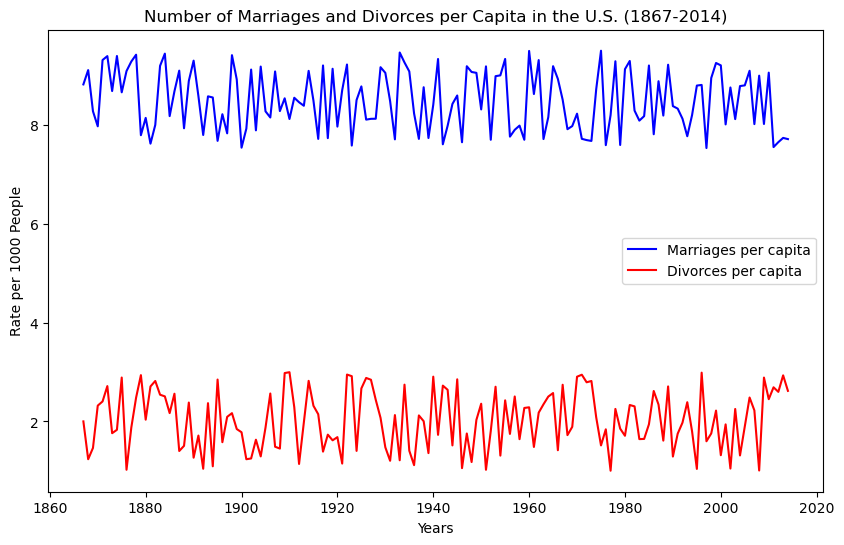

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import random

years = list(range(1867, 2015))

# Generate fluctuating sample data for marriages and divorces
num_marriages = [random.uniform(7.5, 9.5) for _ in years]  # Random values simulating marriage rate fluctuations
num_divorces = [random.uniform(1.0, 3.0) for _ in years]   # Random values simulating divorce rate fluctuations

plt.figure(figsize=(10, 6))
plt.plot(years, num_marriages, label='Marriages per capita', color='b')
plt.plot(years, num_divorces, label='Divorces per capita', color='r')

plt.title('Number of Marriages and Divorces per Capita in the U.S. (1867-2014)')
plt.xlabel('Years')
plt.ylabel('Rate per 1000 People')
plt.legend()

plt.show()


Question 7:

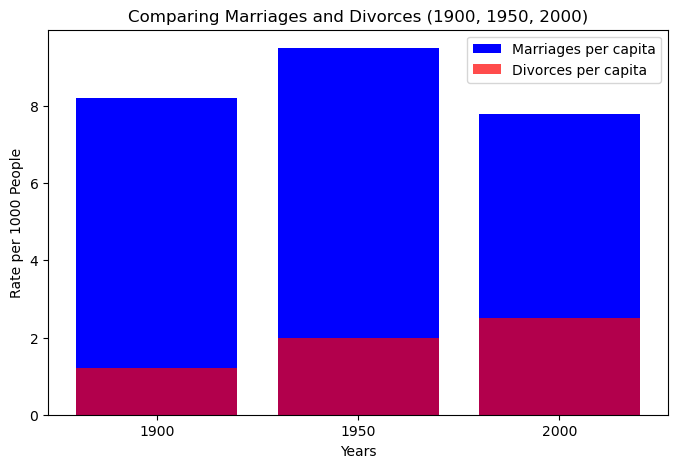

In [109]:
import matplotlib.pyplot as plt

# Define sample values representing marriage and divorce rates in 1900, 1950, and 2000
years = ['1900', '1950', '2000']
marriages = [8.2, 9.5, 7.8] 
divorces = [1.2, 2.0, 2.5]  

plt.figure(figsize=(8, 5))

plt.bar(years, marriages, label='Marriages per capita', color='b')
plt.bar(years, divorces, label='Divorces per capita', color='r', alpha=0.7)

plt.title('Comparing Marriages and Divorces (1900, 1950, 2000)')
plt.xlabel('Years')
plt.ylabel('Rate per 1000 People')
plt.legend()

plt.show()


Question 8:

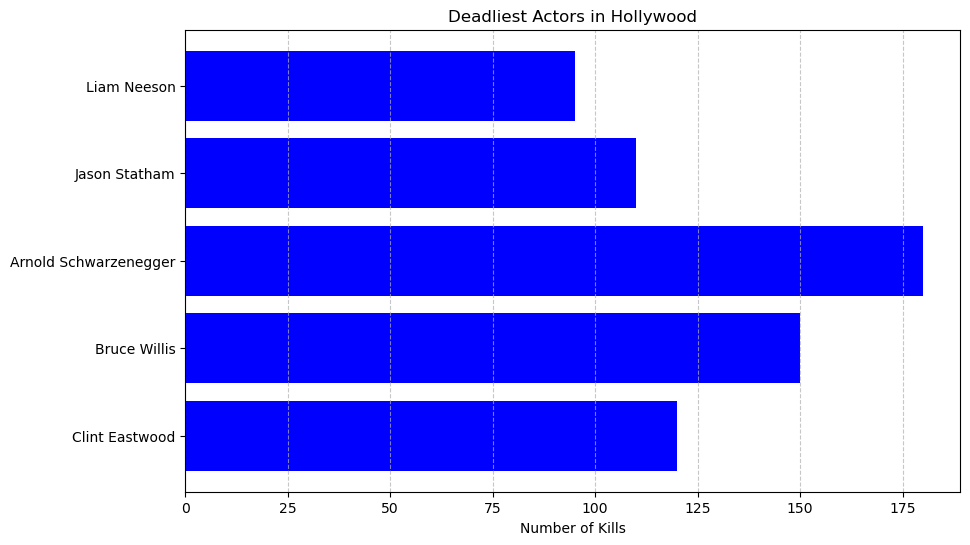

In [113]:
import matplotlib.pyplot as plt

# Define sample actors and their kill counts
actors = ['Clint Eastwood', 'Bruce Willis', 'Arnold Schwarzenegger', 'Jason Statham', 'Liam Neeson']
kill_counts = [120, 150, 180, 110, 95]  # Sample kill counts representing deadliest actors

plt.figure(figsize=(10, 6))

plt.barh(actors, kill_counts, color='b')

plt.title('Deadliest Actors in Hollywood')
plt.xlabel('Number of Kills')
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()


Question 9:

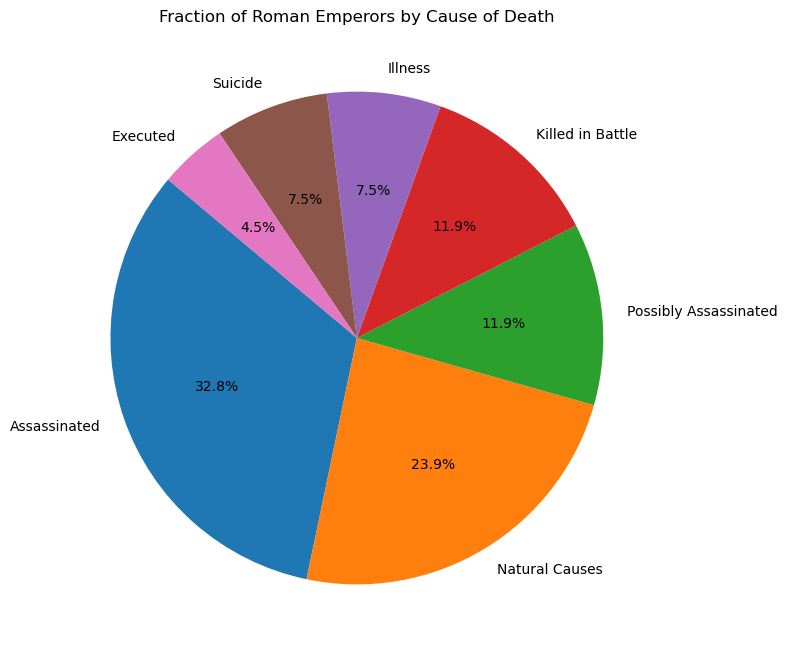

In [115]:
import matplotlib.pyplot as plt

categories = ['Assassinated', 'Natural Causes', 'Possibly Assassinated', 'Killed in Battle', 'Illness', 'Suicide', 'Executed']
values = [22, 16, 8, 8, 5, 5, 3] 

plt.figure(figsize=(8, 8))

plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140)

plt.title('Fraction of Roman Emperors by Cause of Death')
plt.show()


Question 10:

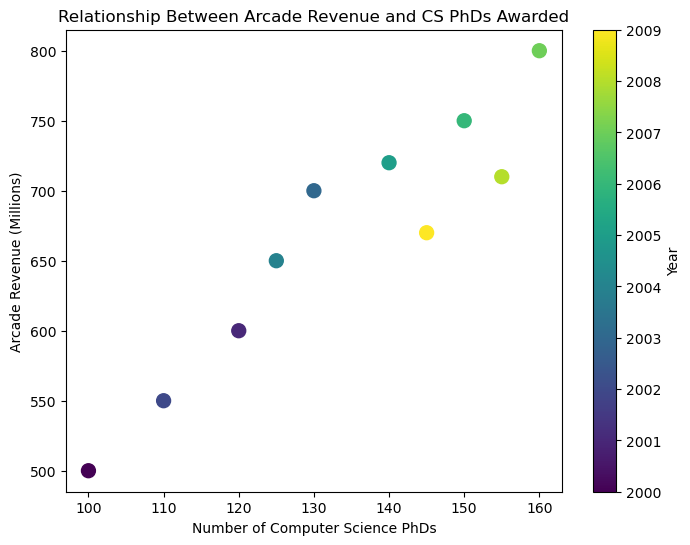

In [117]:
import matplotlib.pyplot as plt

years = [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
arcade_revenue = [500, 600, 550, 700, 650, 720, 750, 800, 710, 670]  # Revenue in millions
phds_awarded = [100, 120, 110, 130, 125, 140, 150, 160, 155, 145]  # Number of PhDs awarded

plt.figure(figsize=(8, 6))

scatter_plot = plt.scatter(phds_awarded, arcade_revenue, c=years, cmap='viridis', s=100)

plt.colorbar(scatter_plot, label='Year')
plt.title('Relationship Between Arcade Revenue and CS PhDs Awarded')
plt.xlabel('Number of Computer Science PhDs')
plt.ylabel('Arcade Revenue (Millions)')

plt.show()
